<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/Ramanathapuram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/csv.csv")
df

,Candidate,Party,Votes,%Votes,Year
0,@ J.K. RITHEESH. K,DMK,47850,34.93,2009
1,SATHIAMOORTHY. V,AIADMK,38698,28.25,2009
2,THIRUNNAVUKKARASAR. SU,BJP,28551,20.85,2009
3,SINGAI JINNAH. S,DMDK,9393,6.86,2009
4,SALEEMULLA KHAN S,MAMAK,6712,4.90,2009
5,PRISCILLA PANDIAN (THIRUMATHI),BSP,3119,2.28,2009
6,ANWHAR RAAJHAA.A,AIADMK,63268,34.38,2014
7,KUPPURAMU .D,BJP,51479,27.97,2014
8,MOHAMED JALEEL .S,DMK,49089,26.67,2014
9,THIRUNNAVUKKARASAR .SU,INC,5905,3.21,2014


In [ ]:
df.shape

(16, 5)

In [ ]:
df.columns

Index(['Candidate', 'Party', 'Votes', '%Votes', 'Year'], dtype='object')

In [ ]:
numerical = len(df.select_dtypes(include=['int64', 'float64']).columns)
categorical = len(df.select_dtypes(include=['object']).columns)
print("Number of numerical features :", numerical)
print("Number of categorical features :", categorical)

Number of numerical features : 3
Number of categorical features : 2


In [ ]:
df.nunique()

Candidate    16
Party        12
Votes        16
%Votes       16
Year          3
dtype: int64

In [ ]:
df.value_counts('Candidate')

Candidate
@ J.K. RITHEESH. K                1
ANWHAR RAAJHAA.A                  1
K. NAVASKANI                      1
KUPPURAMU .D                      1
MOHAMED JALEEL .S                 1
NAINAR NAGENTHRAN                 1
NOOR JIYAVUDEEN.M.I               1
PRISCILLA PANDIAN (THIRUMATHI)    1
SALEEMULLA KHAN S                 1
SATHIAMOORTHY. V                  1
SINGAI JINNAH. S                  1
T. BHUVANESWARI                   1
THIRUNNAVUKKARASAR .SU            1
THIRUNNAVUKKARASAR. SU            1
UMA MAGESWARI R.T.                1
V.D.N. ANANDH. B.E.,              1
dtype: int64

In [ ]:
df.value_counts('Party')

Party
BJP            3
AIADMK         2
DMK            2
BSP            1
CPI            1
DMDK           1
INC            1
IUML           1
Independent    1
MAMAK          1
NTK            1
SDPI           1
dtype: int64

In [ ]:
party_counts = df['Party'].value_counts()
most_common_party = party_counts.idxmax()
most_common_party

'BJP'

In [ ]:
df.value_counts('Votes')

Votes
2189     1
3119     1
5392     1
5905     1
6712     1
7919     1
9393     1
17995    1
28551    1
38698    1
47850    1
49089    1
51479    1
63268    1
73078    1
88543    1
dtype: int64

In [ ]:
df.value_counts('%Votes')

%Votes
1.19     1
2.28     1
2.93     1
3.21     1
4.00     1
4.90     1
6.86     1
9.20     1
20.85    1
26.67    1
27.97    1
28.25    1
34.38    1
34.93    1
37.30    1
45.20    1
dtype: int64

In [ ]:
df.value_counts('Year')

Year
2009    6
2014    6
2019    4
dtype: int64

In [ ]:
df.groupby(['Party', 'Year'])['Votes'].sum()

Party        Year
AIADMK       2009    38698
             2014    63268
BJP          2009    28551
             2014    51479
             2019    73078
BSP          2009     3119
CPI          2014     2189
DMDK         2009     9393
DMK          2009    47850
             2014    49089
INC          2014     5905
IUML         2019    88543
Independent  2019    17995
MAMAK        2009     6712
NTK          2019     7919
SDPI         2014     5392
Name: Votes, dtype: int64

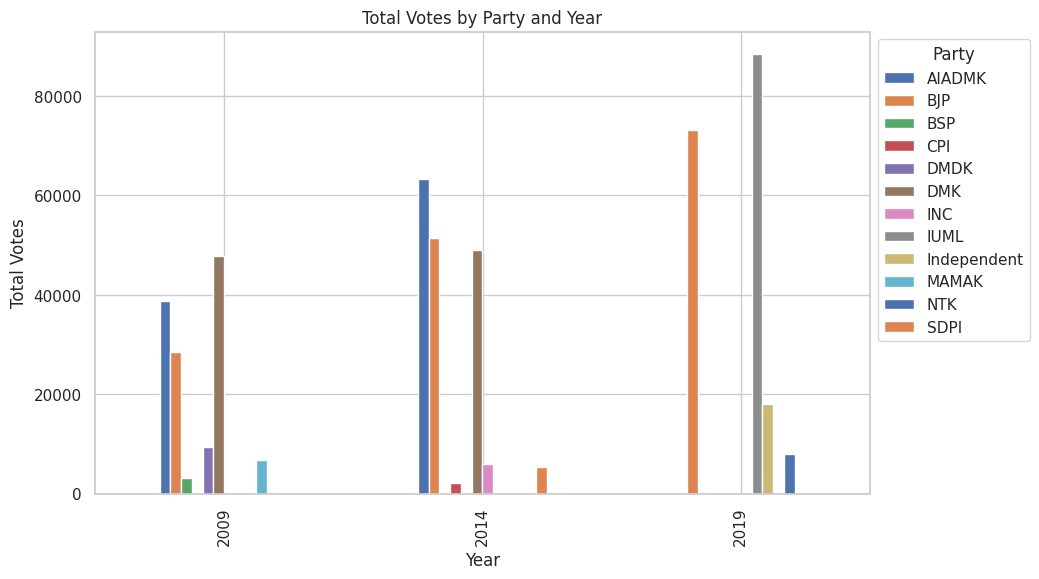

In [ ]:

party_year_votes = df.groupby(['Party', 'Year'])['Votes'].sum()

party_year_votes = party_year_votes.reset_index()

party_year_votes.pivot(index='Year', columns='Party', values='Votes').plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Total Votes by Party and Year')
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
df.groupby('Party')['Votes'].sum()


Party
AIADMK         101966
BJP            153108
BSP              3119
CPI              2189
DMDK             9393
DMK             96939
INC              5905
IUML            88543
Independent     17995
MAMAK            6712
NTK              7919
SDPI             5392
Name: Votes, dtype: int64

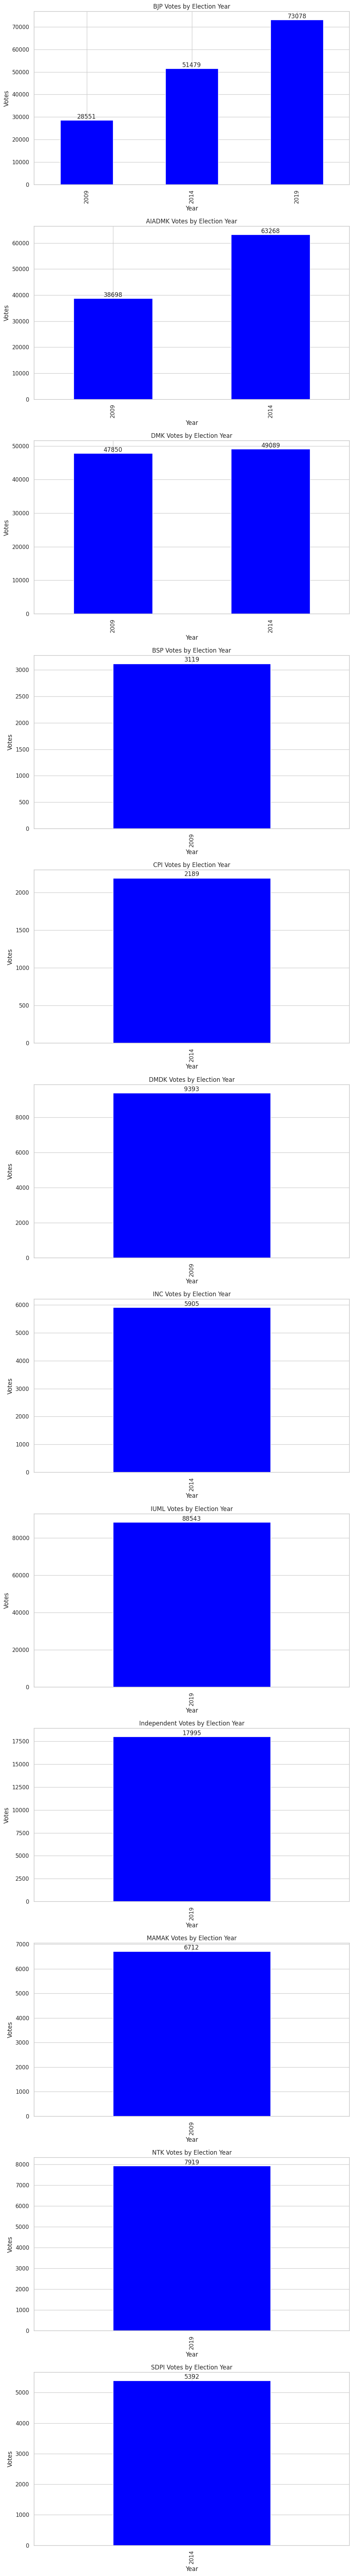

In [ ]:
import matplotlib.pyplot as plt

# List of parties
parties = ['BJP', 'AIADMK', 'DMK', 'BSP', 'CPI', 'DMDK', 'INC', 'IUML', 'Independent', 'MAMAK', 'NTK', 'SDPI']

# Create subplots for each party
fig, axes = plt.subplots(nrows=len(parties), ncols=1, figsize=(10, 6*len(parties)))

# Iterate over each party and plot the bar plot
for party, ax in zip(parties, axes):
    # Filter the DataFrame for rows where the 'Party' column matches the current party
    party_votes = df[df['Party'] == party]

    # Group the filtered DataFrame by the 'Year' column and sum the 'Votes' column
    party_votes_yearly = party_votes.groupby('Year')['Votes'].sum()

    # Plot the bar plot for the current party
    party_votes_yearly.plot(kind='bar', ax=ax, color='blue')

    # Add count annotations to each bar
    for i, v in enumerate(party_votes_yearly):
        ax.text(i, v + 10, str(v), ha='center', va='bottom')

    # Add labels and title for the current party
    ax.set_xlabel('Year')
    ax.set_ylabel('Votes')
    ax.set_title(f'{party} Votes by Election Year')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


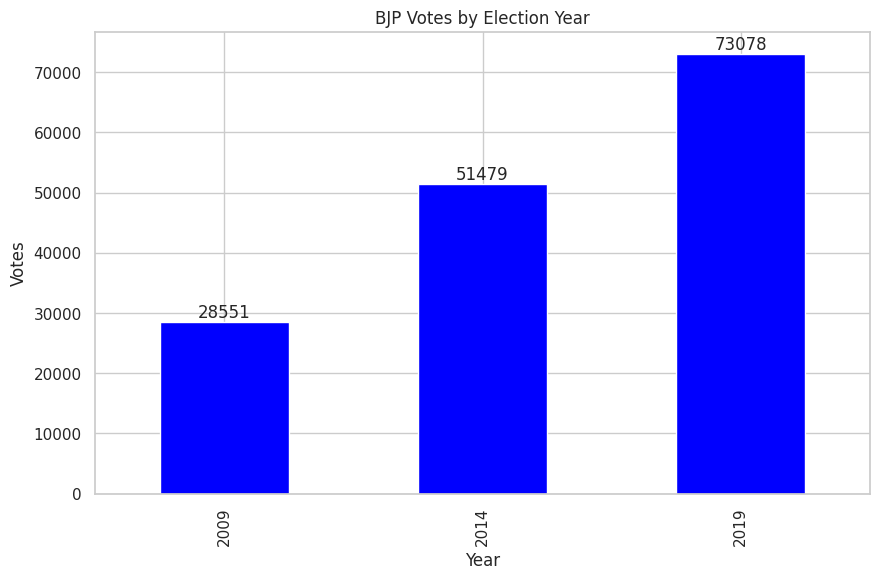

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where the 'Party' column is 'BJP'
bjp_votes = df[df['Party'] == 'BJP']

# Group the filtered DataFrame by the 'Year' column and sum the 'Votes' column
bjp_votes_yearly = bjp_votes.groupby('Year')['Votes'].sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = bjp_votes_yearly.plot(kind='bar', color='blue')

# Add count annotations to each bar
for i, v in enumerate(bjp_votes_yearly):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('BJP Votes by Election Year')

# Show plot
plt.show()


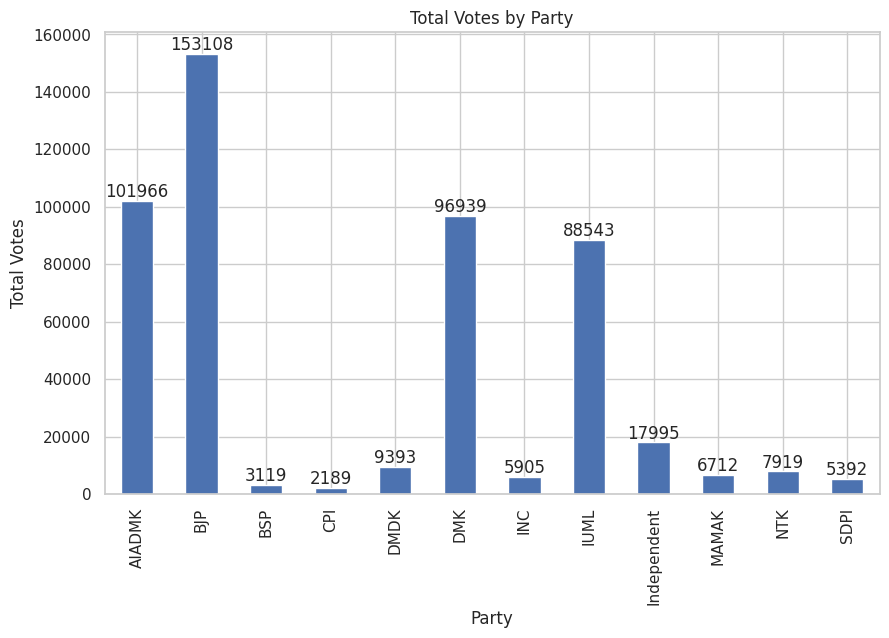

In [ ]:

party_votes = df.groupby('Party')['Votes'].sum()

ax = party_votes.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.title('Total Votes by Party')

for i, v in enumerate(party_votes):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()


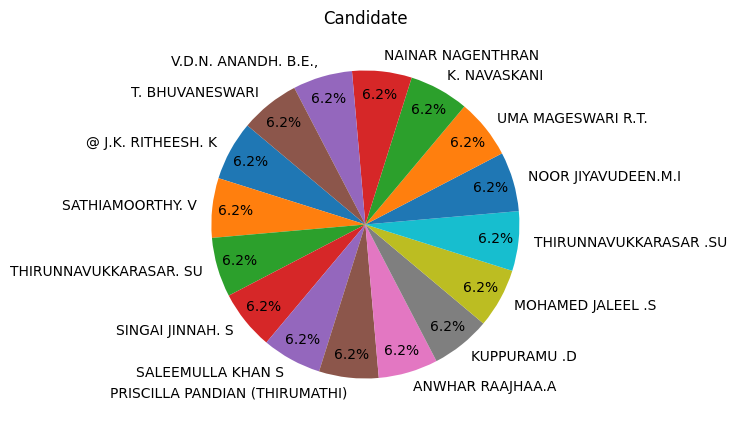

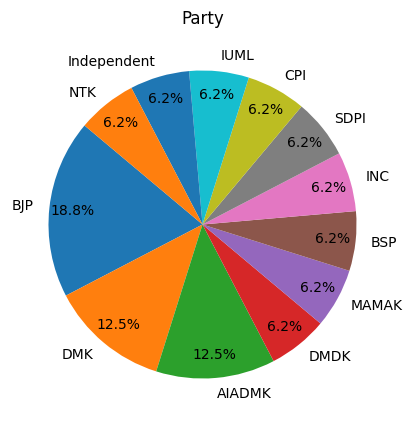

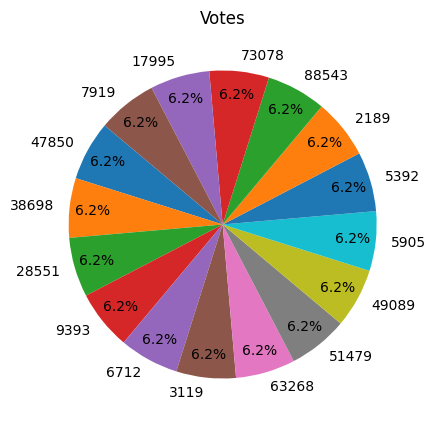

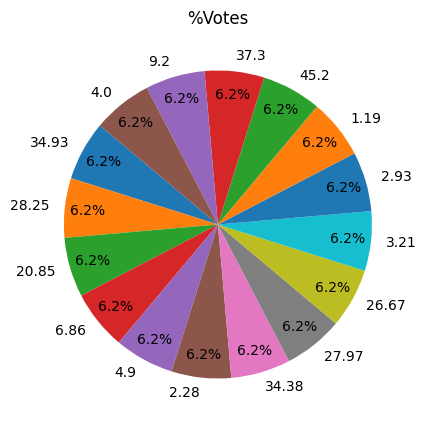

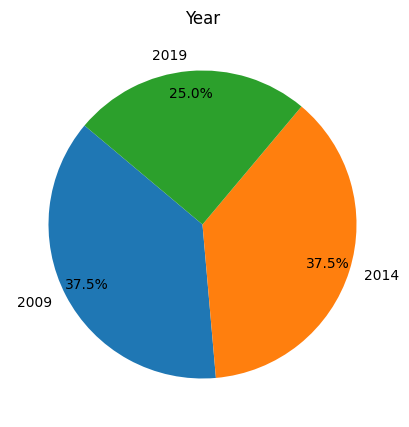

In [ ]:
gender_counts = df['Candidate'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
ax.set_title('Candidate')
plt.show()


location_counts = df['Party'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
ax.set_title('Party')
plt.show()

assembly_counts = df[ 'Votes'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.pie(assembly_counts, labels=assembly_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
ax.set_title('Votes')
plt.show()

pm_counts = df['%Votes'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.pie(pm_counts, labels=pm_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
ax.set_title('%Votes')
plt.show()

ruling_counts = df['Year'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.pie(ruling_counts, labels=ruling_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
ax.set_title('Year')
plt.show()


In [ ]:
# Specify the party and year for which you want to find the count of votes
party_names = ['BJP', 'AIADMK', 'DMK', 'BSP', 'CPI', 'DMDK', 'INC', 'IUML', 'Independent', 'MAMAK', 'NTK', 'SDPI']
year_value = 2019  # Change this to the desired year

# Filter the DataFrame for rows where the 'Party' column matches the specified party and the 'Year' column matches the specified year
party_year_votes = df[(df['Party'].isin(party_names)) & (df['Year'] == year_value)]

# Calculate the total count of votes for the specified party in the specified year
total_votes = party_year_votes.groupby('Party')['Votes'].sum()

print(f"In {year_value}:")
for party, votes in total_votes.items():
    print(f"{party} received {votes} votes.")


In 2019:
BJP received 73078 votes.
IUML received 88543 votes.
Independent received 17995 votes.
NTK received 7919 votes.


In [ ]:
# Specify the party and year for which you want to find the count of votes
party_names = ['BJP', 'AIADMK', 'DMK', 'BSP', 'CPI', 'DMDK', 'INC', 'IUML', 'Independent', 'MAMAK', 'NTK', 'SDPI']
year_value = 2009  # Change this to the desired year

# Filter the DataFrame for rows where the 'Party' column matches the specified party and the 'Year' column matches the specified year
party_year_votes = df[(df['Party'].isin(party_names)) & (df['Year'] == year_value)]

# Calculate the total count of votes for the specified party in the specified year
total_votes = party_year_votes.groupby('Party')['Votes'].sum()

print(f"In {year_value}:")
for party, votes in total_votes.items():
    print(f"{party} received {votes} votes.")


In 2009:
AIADMK received 38698 votes.
BJP received 28551 votes.
BSP received 3119 votes.
DMDK received 9393 votes.
DMK received 47850 votes.
MAMAK received 6712 votes.


In [ ]:
# Specify the party and year for which you want to find the count of votes
party_names = ['BJP', 'AIADMK', 'DMK', 'BSP', 'CPI', 'DMDK', 'INC', 'IUML', 'Independent', 'MAMAK', 'NTK', 'SDPI']
year_value = 2014  # Change this to the desired year

# Filter the DataFrame for rows where the 'Party' column matches the specified party and the 'Year' column matches the specified year
party_year_votes = df[(df['Party'].isin(party_names)) & (df['Year'] == year_value)]

# Calculate the total count of votes for the specified party in the specified year
total_votes = party_year_votes.groupby('Party')['Votes'].sum()

print(f"In {year_value}:")
for party, votes in total_votes.items():
    print(f"{party} received {votes} votes.")


In 2014:
AIADMK received 63268 votes.
BJP received 51479 votes.
CPI received 2189 votes.
DMK received 49089 votes.
INC received 5905 votes.
SDPI received 5392 votes.


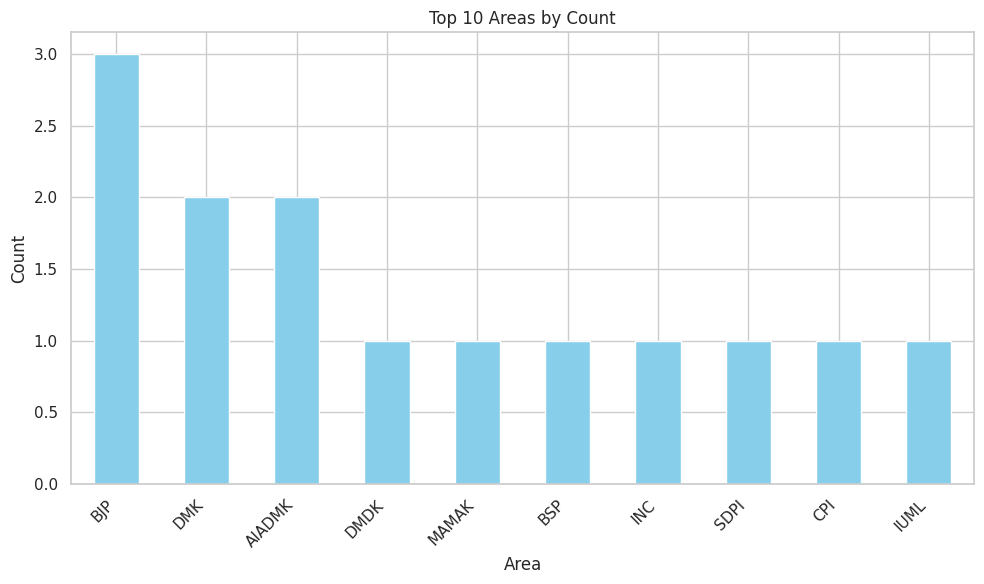

In [ ]:
top_10_areas = df['Party'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_areas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Areas by Count')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

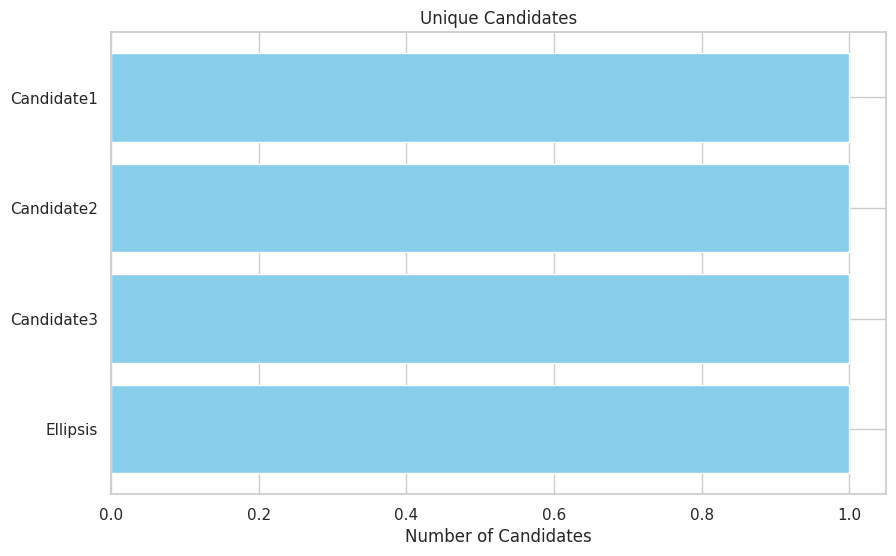

In [ ]:
import matplotlib.pyplot as plt

# Data
candidates = ['Candidate1', 'Candidate2', 'Candidate3', ...]  # Replace with actual candidate names
num_candidates = len(candidates)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(num_candidates), [1] * num_candidates, color='skyblue')
plt.yticks(range(num_candidates), candidates)
plt.xlabel('Number of Candidates')
plt.title('Unique Candidates')
plt.gca().invert_yaxis()
plt.show()
